# Iris Classifier

Implement the *train_and_predict* function which should be able to classify three types of irises based on four features


parameters for *train_and_predict* function:
* train_input_features - 2D NumPy array with each element contains sepal length, sepal width, petal length, and petal width
* train_outputs - 1D array where each element is a number representing the species of iris; 0 is setosa, 1 versicolor, 2 virginica
* prediction_features - 2D array; sepal length, sepal width, petal length, petal width

**Note:**  
When you're in the process of writing code, you might define functions or classes that you plan to implement later. In such cases, you can use `pass` as a placeholder to indicate that the function or class exists but doesn't have any code yet. For example:

```
def my_function():   
    pass  # This function doesn't do anything yet  
```

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

def train_and_predict(train_input_features, train_outputs, prediction_features):
    # initialize model
    model = LogisticRegression()
    # train the model
    model.fit(train_input_features, train_outputs)
    # perform prediction
    return model.predict(prediction_features)

iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.3, random_state=0)

y_pred = train_and_predict(X_train, y_train, X_test)
if y_pred is not None:
    print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred),4))

Accuracy: 0.9778


## Classification Problem: Iris Data Set

Import data

If you're working with scikit-learn datasets, you can typically access the description using the .DESCR attribute.

In [2]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
# print description; 
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The dir() function in Python is used to get a list of names in the current local scope or the names in the scope of an object. When called without an argument, it returns a list of names in the current scope.

In [3]:
# print dictionary keys and values
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [4]:
import pandas as pd

# save data as DataFrame
df = pd.DataFrame(iris.data)
# rename column based on the data description
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# identify target variable
target = pd.DataFrame(iris.target)
# alternative way to 
target = target.rename(columns= {0:'target'})

Exploratory Data Analysis (EDA)

In [5]:
# concatenate features and target variables together
df = pd.concat([df, target], axis =1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# data types/info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
# check for missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

Analyze the summary statistics to identify the spread of the data. We can also check for outliers by looking at the min and max values of each column. 

In [8]:
# summary stats
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Axes: >

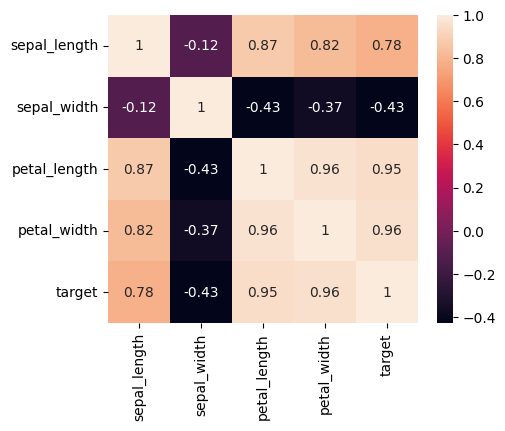

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualization
# 1. correlation
plt.figure(figsize = (5,4))
sns.heatmap(df.corr(), annot=True)

From the correlation plot, we can see that petal length and width are the most correlated to the target feature. 

Note on the intuitiveness of treating the target variable as continuous variable. In this case, we're saying that the higher the class of flower (e.g. 2), the longer the petal length. 

In [10]:
df.drop(columns='target').columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

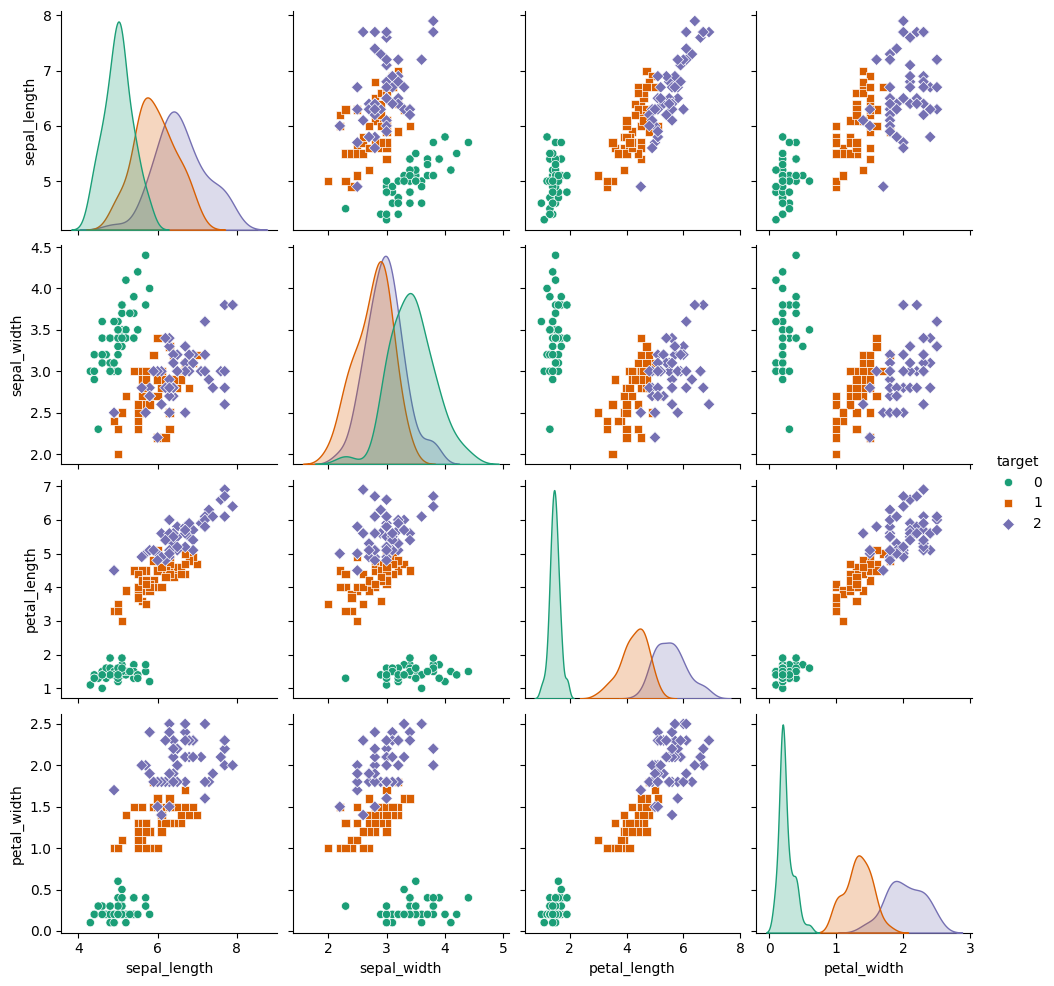

In [11]:
# 2. distrbution- scatter plot/histogram  
# Note that sns.pairplot parameter kind accepts the following input: 
# kde - kernel density plot
# scatter - scatter plots
# reg - linear regression fits and univariate distribution plots 
# hist - histogram on the off diagonal subplots
# hex - hexbin plots in the off-diagonal subplots 

# notes for markers: 
#'o': Represents a circle marker, 
#'s': Represents a square marker.
#'D': Represents a diamond marker.
sns.pairplot(df, kind='scatter', vars=df.drop(columns='target').columns, hue='target', palette='Dark2', markers=['o', 's', 'D'])


Modeling

`.pop()` method is used to remove and return an item from a list

In [12]:
from sklearn.model_selection import train_test_split

# define X, y
X = df.copy()
y = X.pop('target')

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

By stratifying on y, we assure that the different classes are represented proportionally in both train and test data. 

In [13]:
from sklearn.preprocessing import StandardScaler

# standardize, if necessary
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

The baseline is the probability of predicting class before the model is implemented i.e. the proportion of the target feature's value. This is also helpful to identify strong class imbalance on the target feature. 

In [14]:
df.target.value_counts(normalize=True)

target
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

In [15]:
from sklearn.linear_model import LogisticRegression

# initialize model
model = LogisticRegression()

# fit the model to training data
model.fit(X_train, y_train)

# perform prediction
y_pred = model.predict(X_test)

Evaluate model

In [16]:
from sklearn.model_selection import cross_val_score

# cross-validate score to ensure the model's strength
# specify the metrics used using the parameter 'scoring= '
scores = cross_val_score(model, X_train, y_train, cv=10)
print(np.mean(scores))

0.9499999999999998


In [17]:
from sklearn.metrics import classification_report

# classification report
report = classification_report(y_test, y_pred)
print("Classification Report: \n", report)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



* Accuracy: (TP + TN) / (TP + FP + TN + FN)  
* Precision: TP / (TP + FP)  i.e. correct predict out of predicted value
* Recall: TP / (TP + FN) i.e. correctly predict over actual value
* F1-score: (2 x Precision x Recall) / (Precision + Recall)

In [18]:
# get the regression coefficients
df_coef = pd.DataFrame(model.coef_, columns=X_train.columns)
df_coef

,sepal_length,sepal_width,petal_length,petal_width
0,-1.102746,1.001818,-1.836891,-1.667978
1,0.402982,-0.323432,-0.277761,-0.650011
2,0.699764,-0.678386,2.114653,2.317989


In [19]:
from sklearn.metrics import confusion_matrix

# confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred, labels= [2,1,0]), index= [2,1,0], columns= [2,1,0])

,2,1,0
2,9,1,0
1,0,10,0
0,0,0,10


`predict_proba` is used to asess the probabilities of each row of data being assigned to one of the three classes. This cna be helpful to gauge the threshold of assigning the class (e.g. models used to detect cancer cells).

In [20]:
# prediction probabilities
probs = model.predict_proba(X_test)

probs_df = pd.DataFrame(probs, columns=['Class_0', 'Class_1', 'Class_2'])
probs_df.head()

,Class_0,Class_1,Class_2
0,0.000004,0.028776,9.712204e-01
1,0.960636,0.039363,3.987736e-07
2,0.162242,0.830251,7.506671e-03
3,0.981291,0.018708,2.563901e-07
4,0.963340,0.036657,2.620902e-06
